The data in IA3-1.csv has the information about 11914 cars. There are two fields: Maker_Model and
description. The description column contains a set of tags (separated by comma) where the
Maker_Model is also included.

1. Prepare the data for a gensim Word2Vec model

2. Run the model (with size = 50) and display the vector for ‘Toyota Camry’)

3. Compute the similarity between 'Porsche 718 Cayman' and 'Nissan Van'

4. Find the five most similar to 'Mercedes-Benz SLK-Class'

5. Generate a t-SNE graph for a list of 50 unique cars. 

In [1]:
import pandas as pd
import gensim

In [2]:
df = pd.read_csv("IA3-1.csv")

In [3]:
df.columns

Index(['description', 'Maker_Model'], dtype='object')

In [4]:
tag = [row.split(',') for row in df['description']]

In [5]:
model = gensim.models.Word2Vec(tag, min_count=1, size=50, workers=3, window=3, sg=1)

In [6]:
model.wv.__getitem__('Toyota Camry')

array([-0.1433848 ,  0.12685764,  0.05571409,  0.1747307 ,  0.14971957,
       -0.04125328, -0.13066112,  0.07120512,  0.02318802, -0.14606223,
       -0.08847523,  0.19262539,  0.05653566, -0.22813675,  0.1140774 ,
       -0.14516039,  0.3435854 , -0.22212425, -0.12684183,  0.06243094,
       -0.07967209, -0.04685055,  0.18375657,  0.02349623,  0.12254818,
        0.11768724, -0.10671235, -0.11584549, -0.0292027 , -0.20669366,
       -0.06677899, -0.03066008, -0.0284455 ,  0.00297415,  0.14901078,
        0.0249668 , -0.02208972,  0.04425369, -0.31124866, -0.08641295,
        0.1541833 ,  0.06027622, -0.05130026,  0.07633933, -0.17952284,
       -0.18815464,  0.12713322,  0.1079665 ,  0.00378649, -0.17605789],
      dtype=float32)

In [7]:
model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')

0.87647974

In [8]:
model.wv.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Mercedes-Benz CLK-Class', 0.996152937412262),
 ('Maserati GranSport', 0.9949982166290283),
 ('Audi S5', 0.994085967540741),
 ('Mercedes-Benz SLS AMG', 0.9940025806427002),
 ('Scion FR-S', 0.9934676289558411)]

In [12]:
models = df['Maker_Model'].unique().tolist()

from sklearn.manifold import TSNE

X = model.wv.__getitem__(models)

In [13]:
tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1000, random_state=100)
Y = tsne_model.fit_transform(X)

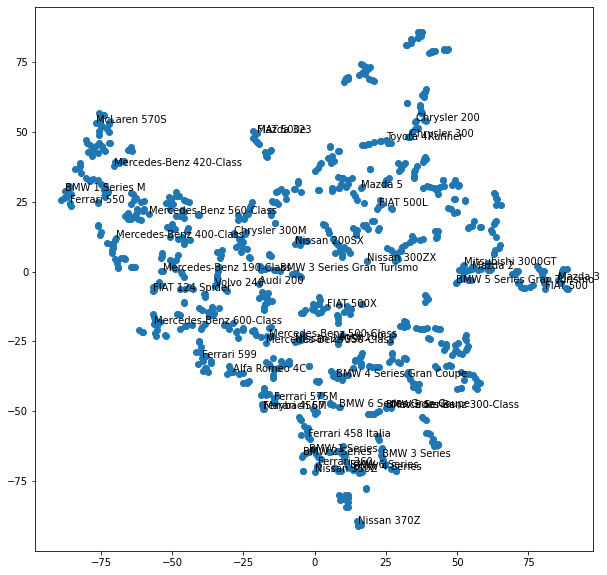

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Y[:, 0], Y[:, 1])
for i, model in enumerate(models[:50]):
    plt.annotate(model, xy=(Y[i,0], Y[i,1]))

plt.savefig("tsne.png")
plt.show()